# Recommending Projects to Donors - DonorChoose.org

![DonorChooseLogo](images/DonorsChoose_org_logo.jpg)

DonorChoose.org is a nonprofit dedicated to providing the funds that teachers need in order to improve the overall quaility of education. This kernel looks through the data to discover insights and build a recommendation system to assist re-engaging donors. 

##### By Jacob Sieber

# Table of Contents:
* [Introduction and Approach](#intro)
* [EDA Highlights](#eda)
* [Building User Profiles](#user-profiles)
* [Building Project Profiles](#project-profiles)
* [Creating a Weighted Recommendation System](#final-product)

# Introduction and Approach

## The problem <a class="anchor" id="intro"></a>

DonorChoose.org wants to find a solution that "will enable DonorsChoose.org to build targeted email campaigns recommending specific classroom requests to prior donors". In any business, one of the greatest revenue-generating segments of customers (or donors) are those who have previously provided revenue. In DonorsChoose.org's case, previous donors already shown a preference for the product and have an email that they can be contacted through. In the EDA stage, the effect of re-engaged customers on the bottom line is quantified. 

The primary focus of this kernel is to generate a solution that will match previous donors to projects that they will likely make donatations toward. 

The three target metrics for the solution are:
* Performance - Good Targeting
* Adaptable - Feasable Implementation
* Intelligible - Easily Understandable

## The approach

By framing the solution as a "Recommender System", there is already a firm foundation of work on which the project can be based. This problem varies from the typical recommender system. Two key differences are: donors tend to "make a single purchase" (donate to a single project) and there are a significant amount of products (projects) that have only one to three donors. This can complicate the more standard recommendation approaches. Therefore, the approach I decided to take was to recommend new projects based both upon features of users and features of projects. Many several new features have been engineered from the dataset.


The best way to begin is to use the data to give a brief overview of the company and the problem we wish to solve using the data we have been provided. Perhaps the most important metrics for any large company is the bottom line, so this kernel begins with examining income and a sucessful solutions possible impact on income. 

In [3]:
# Loading in packages


library(data.table)
library(ggplot2)
library(scales)
library(repr)
library(plotly)
options(repr.plot.width=10, repr.plot.height=4)

Warning message:
"package 'data.table' was built under R version 3.4.4"Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'scales' was built under R version 3.4.4"Warning message:
"package 'repr' was built under R version 3.4.4"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [4]:
# Loading in data

Donations <- fread('data/Donations.csv')
Donors <- fread('data/Donors.csv')
Projects <- fread('data/Projects.csv')
Resources <- fread('data/Resources.csv')
Schools <- fread('data/Schools.csv')
Teachers <- fread('data/Teachers.csv')

In [5]:
# Adjusting the data for graphing and modeling

Donations[, `Donation Received Date` := anytime::anydate(`Donation Received Date`)]
Donations[, Year := format(`Donation Received Date`, '%Y')]
Donation_by_day <- Donations[,.(Total_Donations = sum(`Donation Amount`)), by = `Donation Received Date`]
Donation_by_day[, Year := format(`Donation Received Date`, '%Y')]

Projects$`Project Cost` <- as.numeric(gsub('[$,]', '', Projects$`Project Cost`))

### Revenue Year by Year

There is a strong upward trend on annual revenue. This is great news for DonorsChoose.org!

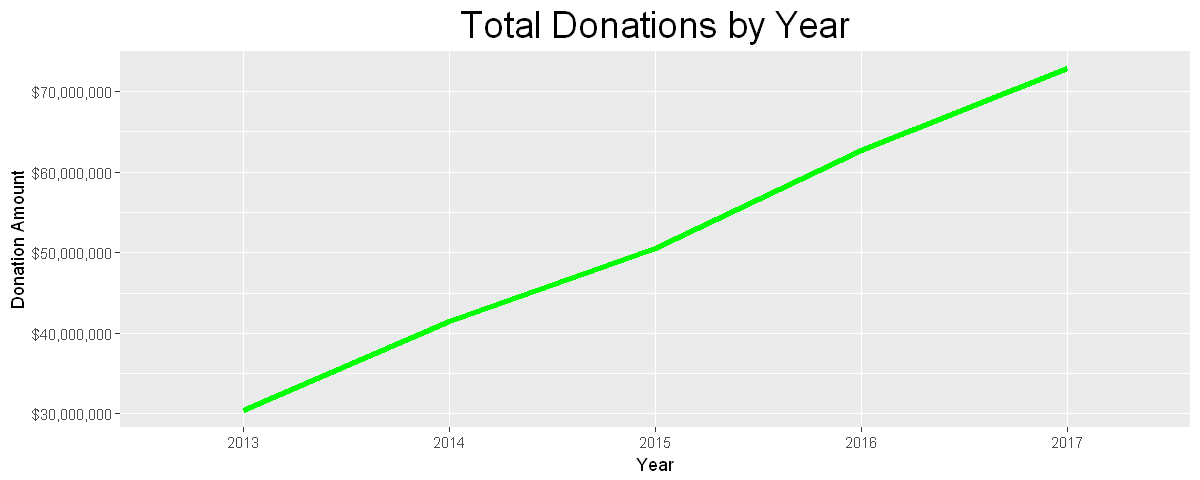

In [6]:
# Data transformation

plot_data  <- Donations[Year!=2018 & Year!=2012,.(`Donation Amount` = sum( `Donation Amount`)), by =.(Year,`Donation Included Optional Donation`)]
plot_data  <- plot_data[,.(`Donation Amount`,`Direct Revenue` = (sum(`Donation Amount`[`Donation Included Optional Donation` == 'Yes']))*.15), by =.(Year,`Donation Included Optional Donation`)]

# Plotting total donations provided by donors by year

ggplot(plot_data[,.(`Donation Amount` = sum(`Donation Amount`)), by = Year], aes(Year, `Donation Amount`,group = 1)) +
    geom_line(color = 'green', size = 1.5) +
    scale_y_continuous(labels=dollar_format()) +
    labs(title = 'Total Donations by Year') +
    theme(plot.title = element_text(hjust = 0.5, size = 22))



# Funding for DonorsChoose.org Operations

If we consider the operations funding to come directly from donations that have included the optional donation (15%), there is also strong growth in contributions directly for operations

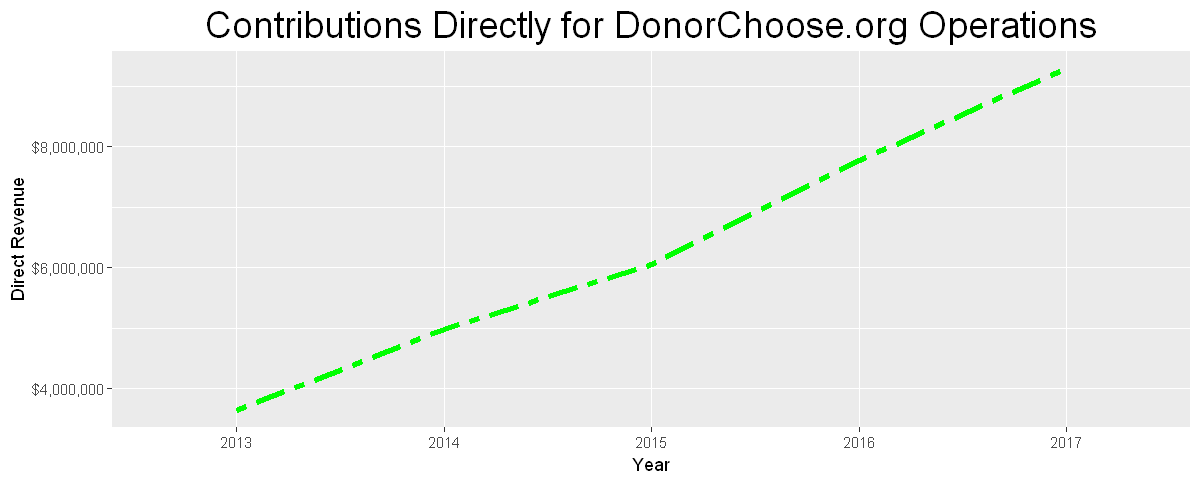

In [7]:
ggplot(data = plot_data[`Donation Included Optional Donation` == 'Yes'], aes(Year,`Direct Revenue`,group = 1))+
    geom_line(linetype = 'twodash', color ='green',size = 1.5) +
    scale_y_continuous(labels=dollar_format()) +
    labs(title = 'Contributions Directly for DonorsChoose.org Operations') +
    theme(plot.title = element_text(hjust = 0.5, size = 22))

## Donations Received over Time

If we consider

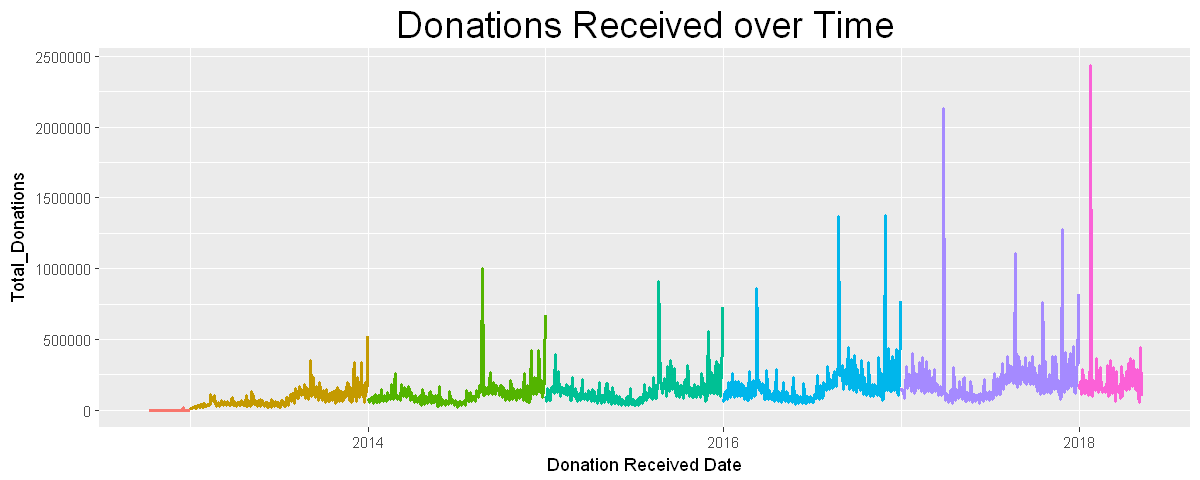

In [9]:
ggplot(Donation_by_day, aes(`Donation Received Date`, Total_Donations)) +
    geom_line(size = 1, aes(color = Year)) +
    theme(legend.position="none") +
    theme(plot.title = element_text(hjust = 0.5, size = 22)) +
    labs(title = 'Donations Received over Time') 

### Framing the problem and solution

We can see that the later half of the year has 

## First Bullet Header 